# Horn Radio Telescope Spectra Plotting Usage Examples

### Glen Langston, 2021 September 23

This notebook shows examples of plotting observations of our Milky Way galaxy.  The notebook expects to read data in Radio Astronomy Service (RAS) ascii format.   There are two file types, Astronomy observations (.ast) and Calibration, Hot-load, observations (.hot).  The files have exactly the same format except that the .hot observations are made while the horn is pointed towards the ground, elevation < 0.

The calibration methods assume the observations of the ground will see the temperature of the Earth, about 290 Kelvins (about 63 Fahrenheit).   The actual measurement is the sum of the _Receiver_ temperature plus the ground.

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [1]:
# Import the Radio Astronomy Service (RAS) code.
import ras

In [2]:
#Sometimes new packages are flagged as missing the first time the astronomy code is
#imported.   If a package is missing, uncomment these lines and test the installation.
#The ! command indicates the command is executed on the "command line", not in the notebook
#!pip3 install ephem
import ephem

In [3]:
# To simpify working with observations in different directories the "rasnames"
# package will search for .ast and .hot files in lists of directories, as well as a list of
# file names
import rasnames

In [4]:
# now create a Plot object
p = ras.Plot(doDebug=False)

In [5]:
# without arguemnts the plot object lists the command line options
names = p.help("")

ras.help(flags): Plotting Inputs for telescope obs.
Usage: .help('<flags> <files>')
Where <flags> are:
-A optionally scale intensities by count of spectra averaged
-B <sample> Set first sample to plot (default is 1/4 of samples)
-BASE  Fit and remove a spectral baseline
-C optionally flag the center of the band
-E <sample> Set last sample to plot (default is end of samples)
-G <LatRange> Set +/- LatRange acceptable for plotting
-H optionally set the high velocity region for baseline fit
-I <integration time> Time (seconds) to average observations before plotting
-K <dir> optionally keep average hot and cold load calibration observations
-L optionally set the low velocity region for baseline fit
-N <number> optionally set the number of spectra to plot
-O <dir> optionally output intermediate, average files
-P <dir> write PNG and PDF files instead of showing plot
-Q optionally plot intensity versus freQuency, instead of velocity
-R optionally flag known RFI Lines
-S <filename> optionally 

In [6]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
names = p.help("-R -C -I 600. data")
# show the list of fine names found
print(names)

Flagging RFI
Spectral integration time for averaging: 600.000000
['data']


In [7]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
files, count = rasnames.splitNames(names, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Frequency
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:10:51 180.0,-40.0  301.3,-27.5    1.863    1.621   1800000
18:23:58 180.0,-40.0  301.2,-27.4    1.891    1.643   1800000
18:37:04 180.0,-40.0  301.2,-27.4    1.952    1.693   1800000
18:50:11 180.0,-40.0  301.2,-27.3    1.977    1.714   1800000
19:06:02 180.0,-40.0  301.1,-27.2    1.968    1.707   1080000
19:19:09 180.0, 60.0   37.5,  9.6    0.846    0.707   2160000
19:32:15 180.0, 60.0   38.9,  6.7    0.841    0.706   2160000
19:45:22 180.0, 60.0   40.4,  3.8    0.827    0.701   2160000
19:58:28 180.0, 60.0   41.9,  0.9    0.810    0.697   2160000


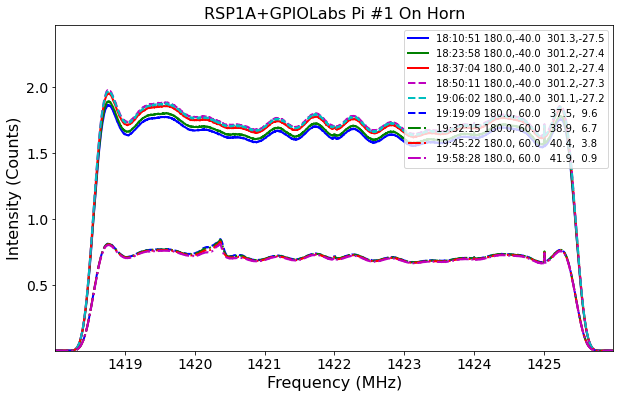

In [8]:
p.raw(files)

In [9]:
# start a new plot with different parameters
p2 = ras.Plot(doDebug=False)

In [33]:
# These next steps show how to steer your notebook to your observations
# The calibrate the spectra.
# You'll have to change your directories to match your system
%cd "/Users/glangsto/Research/archive"
%pwd
dira = "pi1-data-21Sep20/*.hot pi1-data-21Sep10 pi1-data-21Sep27 pi1-data-21Sep30"
# Next plot the t-sys calibrated plot of the observations
#%ls "pi1-data-20Dec10"
files = rasnames.splitNames(dira, doDebug=False)

/Users/glangsto/Desktop/Research/archive
['pi1-data-21Sep20/', '.hot']
Directory: pi1-data-21Sep20/ and matching *.hot


In [34]:
# create yet another plot class
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 900.  Average the different observations for a number seconds
# -G 7.5   Average data within +/- few degrees of the galactic plane
# -V plot velocity in selected range
# -BASE subtract a spectral baseline
# "data" look in the 'data' directory for the observations
p3 = ras.Plot()
names = p3.help("-R -C -I 4500. -V -BASE -G 5. -0 " + dira)
# show the list of fine nams found

Flagging RFI
Spectral integration time for averaging: 4500.000000
Fitting and subtracking a baseline
Plotting Average signals for Galactic Latitude range +/-      5.0
Plotting zero intensity lines


['pi1-data-21Sep20/', '.hot']
Directory: pi1-data-21Sep20/ and matching *.hot
['pi1-data-21Sep20/', '.hot']
Directory: pi1-data-21Sep20/ and matching *.hot
Not a valid file name: pi1-data-21Sep30
Found  81 Hot load observations
Not a valid file name: pi1-data-21Sep30
Found 267 Cold Sky Obs.; Min El =    50.0, Low Gal Lat:    40.0
Median Receiver Temp:  239.04 +/-  0.78 ( 0.26  1.29) (K)
Ploting Intensity versus Velocity
Date: 2021-09-10
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median     Count  
13:20:18 180.0, 50.0  214.6,  0.1    30.37     0.61    382500
Date: 2021-09-11
01:13:20 180.0, 50.0   31.2,  0.3    42.69     1.68    382500
Date: 2021-09-20
Date: 2021-09-27
13:13:35 180.0, 25.0  243.2,  0.3    15.50     0.32    450000
23:13:53 180.0, 25.0    2.7,  0.0    27.62     0.30    472500
Date: 2021-09-28
Not a valid file name: pi1-data-21Sep30


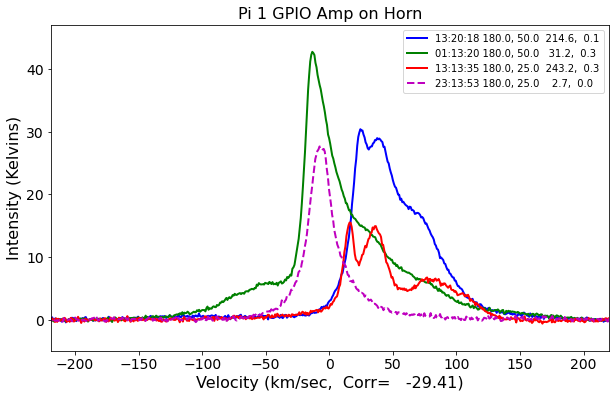

In [35]:
# now plot the average calibrated spectra for several hours of observations
p3.tsys(names, doDebug=False)

In [36]:
!pwd


/Users/glangsto/Desktop/Research/archive
